In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import matplotlib.ticker as mtick

In [4]:
# import data
df = pd.read_csv(
    r'/Users/leogallagher/Documents/FMA-Work/KRG/PFM/Code/Expenditure/processed-data/srm-processed-data/230301-srm-data.csv')

In [6]:
coa_df = pd.read_csv(
    r'/Users/leogallagher/Documents/FMA-Work/KRG/PFM/Code/Expenditure/srm-datapack/standing-data/sd-exp-coa.csv')

In [18]:
df = df.rename(columns={'Account Code': 'account_code'})
coa_df.account_code = coa_df.account_code.astype(str)
df.account_code= df.account_code.astype(str)

In [19]:
merged_df = pd.merge(df, coa_df, on='account_code')

In [24]:
# Create a new dataframe with unique categories from merged_df
spend_cat_df = pd.DataFrame({'category': merged_df['chapter'].unique()})

# Add a new column to spend_cat_df with the sum of 'Amended Line Item IQD' values for each category
spend_cat_df['cat_spend'] = merged_df.groupby('chapter')['Amended Line Item IQD'].sum().values

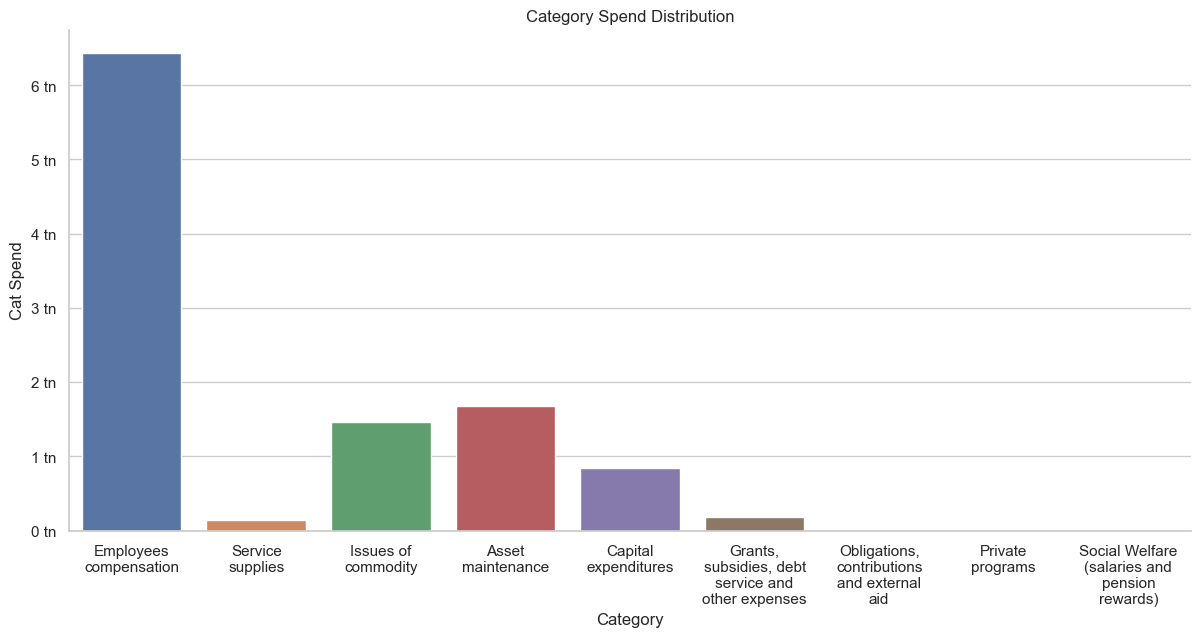

In [37]:
sns.set(style='whitegrid')
sns.color_palette('pastel')

cat_labels = ['Employees compensation', 'Service supplies', 'Issues of commodity', 'Asset maintenance',
              'Capital expenditures','Grants, subsidies, debt service and other expenses',
              'Obligations, contributions and external aid','Private programs',
              'Social Welfare (salaries and pension rewards)']
# Wrap x-axis tick labels
wrapped_labels = [textwrap.fill(label, 15) for label in cat_labels]

# Create the bar chart using catplot
g = sns.catplot(x='category', y='cat_spend', data=spend_cat_df, kind='bar', height=6, aspect=2)
g.set_xticklabels(wrapped_labels)

plt.title('Category Spend Distribution')
plt.xlabel('Category')
plt.ylabel('Cat Spend')

# Format y-axis ticks
fmt = lambda x, pos: f'{x / 1e12:.0f} tn'
g.ax.yaxis.set_major_formatter(mtick.FuncFormatter(fmt))


plt.show()